In [1]:
%load_ext autoreload

In [14]:
%autoreload
import pygmsh
import numpy as np
import jax.numpy as jnp
from dctkit.mesh import util, simplex
from dctkit.math.opt import optctrl
from dctkit.physics.elasticity import LinearElasticity
import dctkit.dec.cochain as C
import dctkit as dt
from matplotlib.pyplot import triplot
import matplotlib.pyplot as plt

In [3]:
dt.config()

In [7]:
lc = 0.1
L = 1.
with pygmsh.geo.Geometry() as geom:
    p = geom.add_polygon([[0., 0.], [L, 0.], [L, L], [0., L]], mesh_size=lc)
    # create a default physical group for the boundary lines
    geom.add_physical(p.lines, label="boundary")
    geom.add_physical(p.lines[0], label="down")
    geom.add_physical(p.lines[2], label="up")
    geom.add_physical(p.lines[1], label="right")
    geom.add_physical(p.lines[3], label="left")
    mesh = geom.generate_mesh()

S = util.build_complex_from_mesh(mesh)
S.get_hodge_star()
S.get_flat_DPD_weights()
ref_node_coords = S.node_coords

In [8]:
down_bnd_nodes_idx = util.get_nodes_for_physical_group(mesh, 1, "down")
up_bnd_nodes_idx = util.get_nodes_for_physical_group(mesh, 1, "up")
down_bnd_edges_idx = util.get_edges_for_physical_group(S, mesh, "down")
up_bnd_edges_idx = util.get_edges_for_physical_group(S, mesh, "up")
left_bnd_nodes_idx = util.get_nodes_for_physical_group(mesh, 1, "left")
right_bnd_nodes_idx = util.get_nodes_for_physical_group(mesh, 1, "right")
left_bnd_edges_idx = util.get_edges_for_physical_group(S, mesh, "left")
right_bnd_edges_idx = util.get_edges_for_physical_group(S, mesh, "right")

In [61]:
mu_ = 1.
lambda_ = 10.
g = 9.81



true_curr_node_coords = ref_node_coords.copy()
true_curr_node_coords[:,0] = ref_node_coords[:,0] - lambda_/(4*mu_**2 + 4*mu_*lambda_)*g*ref_node_coords[:,0]*ref_node_coords[:,1]
true_curr_node_coords[:,1] = ref_node_coords[:,1] + 0.5*((2*mu_ + lambda_)/(4*mu_**2 + 4*mu_*lambda_))*g*ref_node_coords[:,1]**2  - 0.5*(2*mu_ + lambda_)/(4*mu_**2 + 4*mu_*lambda_)*g

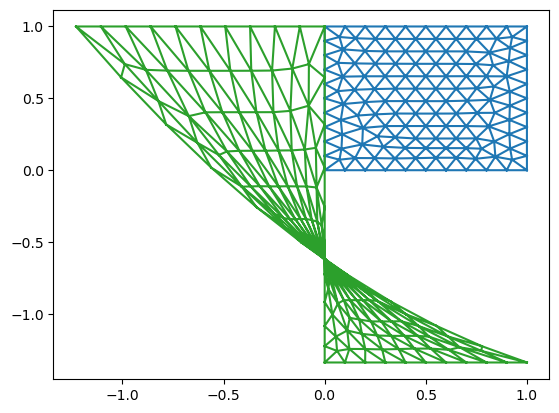

In [62]:
triplot(ref_node_coords[:,0], ref_node_coords[:,1], triangles=S.S[2])
triplot(true_curr_node_coords[:,0], true_curr_node_coords[:,1], triangles=S.S[2])
plt.show()